In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv


In [2]:
data = "/kaggle/input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv"
df=pd.read_csv(data)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.shape
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            6362620 non-null  int64  
 1   type            6362620 non-null  object 
 2   amount          6362620 non-null  float64
 3   nameOrig        6362620 non-null  object 
 4   oldbalanceOrg   6362620 non-null  float64
 5   newbalanceOrig  6362620 non-null  float64
 6   nameDest        6362620 non-null  object 
 7   oldbalanceDest  6362620 non-null  float64
 8   newbalanceDest  6362620 non-null  float64
 9   isFraud         6362620 non-null  int64  
 10  isFlaggedFraud  6362620 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


> **Checking the values:**

In [4]:
print(df.type.value_counts())
print(df['isFlaggedFraud'].value_counts())
print(df['isFraud'].value_counts())

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64
0    6362604
1         16
Name: isFlaggedFraud, dtype: int64
0    6354407
1       8213
Name: isFraud, dtype: int64


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


>****Creating a countplot****

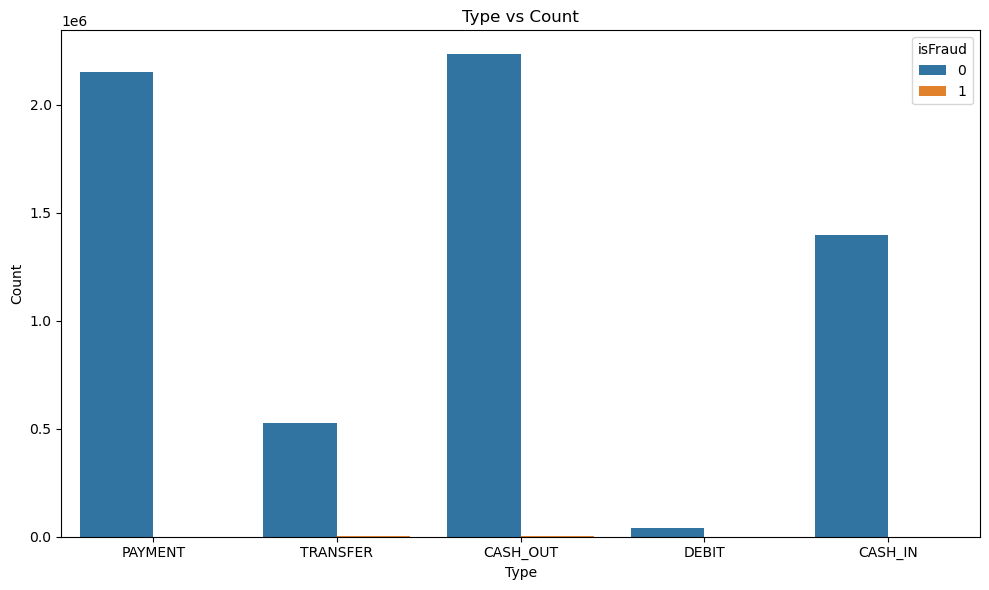

In [7]:
plt.figure(figsize=(10, 6))
plt.title("Type vs Count")
sns.countplot(data=df,x="type",hue="isFraud")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

>**Creating a barplot**

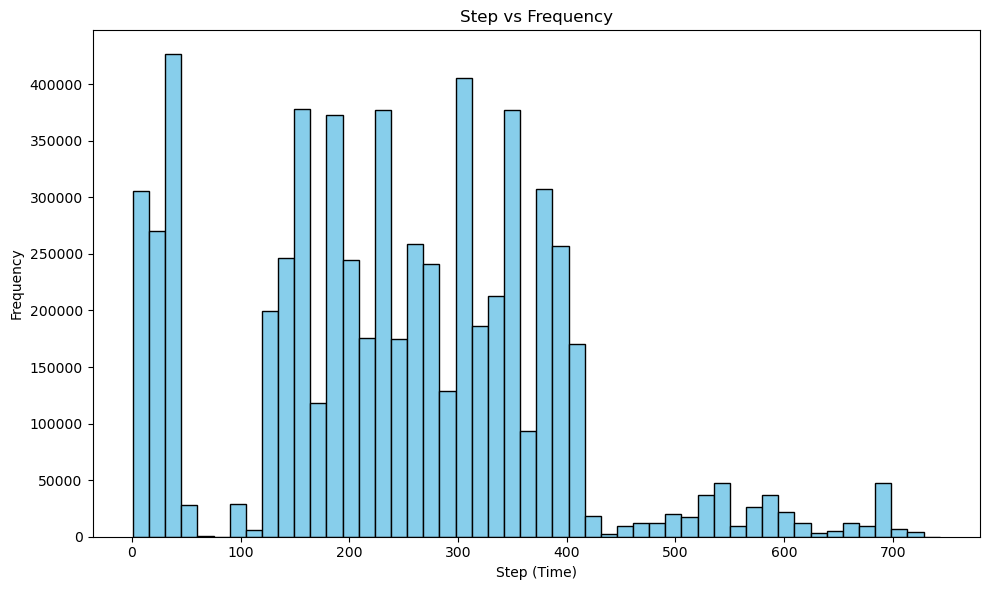

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(df['step'],bins=50,color='skyblue',edgecolor='black')
plt.title("Step vs Frequency")
plt.xlabel("Step (Time)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

> ****Creating a Boxplot****

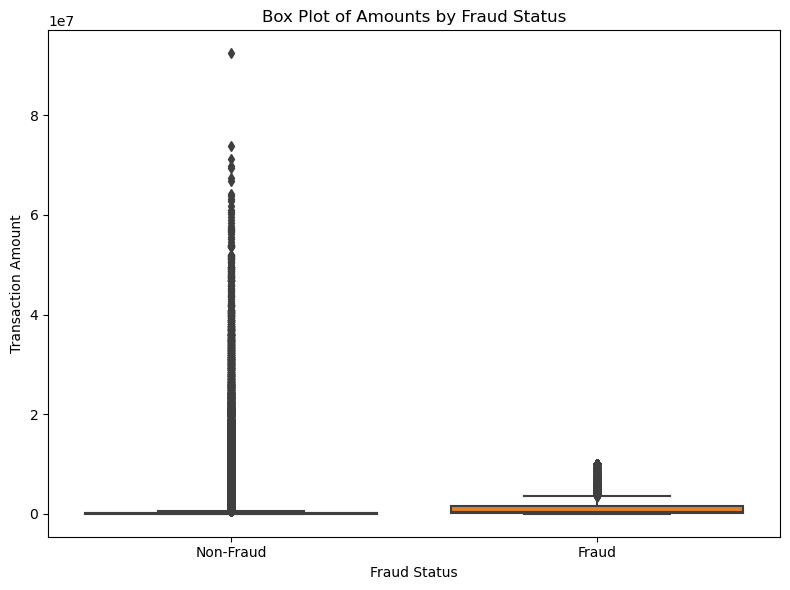

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='isFraud', y='amount')
plt.title("Box Plot of Amounts by Fraud Status")
plt.xlabel("Fraud Status")
plt.ylabel("Transaction Amount")
plt.xticks([0, 1], labels=["Non-Fraud", "Fraud"])
plt.tight_layout()
plt.show()

> ****one-hot encoding****

In [10]:
df_encoded = pd.get_dummies(df, columns=['type'], drop_first=True)
df_encoded.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


> ****Importing Model training and Accuracy checking libraries****

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

> ****Defining features and target variable****

In [12]:
X = np.array(df_encoded[["type_CASH_OUT","type_DEBIT","type_PAYMENT","type_TRANSFER","amount","oldbalanceOrg","newbalanceOrig"]])
y = np.array(df_encoded[["isFraud"]])

> ****Splitting the data into training and testing sets****

In [13]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)

> ****Scaling the numerical features as the numbers are too big****

In [14]:
scaler=StandardScaler()
X_train2 =scaler.fit_transform(X_train)
X_test2=scaler.transform(X_test)

> ****Creating a Decision Tree Classifier****

In [15]:
model=DecisionTreeClassifier()
model.fit(X_train2,y_train)

DecisionTreeClassifier()

> ****Predicting****

In [16]:
y_prediction = model.predict(X_test2)

> ****At last, checking the accuracy****

In [17]:
print("Accuracy:",accuracy_score(y_test,y_prediction))

Accuracy: 0.9996974516787109
